---
# 1. Project Overview 
---

## **Company Bankruptcy Prediction - Part 2**  
**Advanced Machine Learning for Financial Risk Assessment**  

This second part of the **Company Bankruptcy Prediction** project focuses on feature engineering, modeling, and evaluation using advanced machine learning techniques. The goal is to build a **robust predictive model** that can classify companies as bankrupt or not based on financial indicators.  

**Structure of Part 2**  

1. **Feature Engineering & Data Preprocessing**  
   - Data normalization  
   - Handling class imbalance  
2. **Modeling & Evaluation**  
   - Training and evaluating machine learning models  
   - Comparing different algorithms  
3. **Conclusion & Next Steps**  
   - Insights into the most effective models  
   - Recommendations for further optimization  

**Machine Learning Models Used**  

This analysis compares different algorithms for bankruptcy prediction, evaluating their **accuracy, generalization ability, and robustness** with real financial data. The models used include:  

- **Support Vector Machine (SVM)** → A powerful model for financial classification with maximum margin separation.  
- **K-Nearest Neighbors (KNN)** → A distance-based model that classifies companies based on similarity.  
- **Naïve Bayes (NB)** → A probabilistic classifier effective for small datasets.  
- **Decision Tree (CART)** → A rule-based decision tree model.  
- **Multilayer Perceptron (MLP)** → A neural network model capable of capturing complex relationships.  
- **Random Forest (RF)** → An ensemble of decision trees that improves prediction accuracy.  
- **Extreme Gradient Boosting (XGBoost)** → A boosting-based model, highly effective for structured data.  
- **Logistic Regression (LR)** → A statistical model for binary classification, widely used in financial risk assessment.  

**Evaluation Metrics**  

To ensure the model's effectiveness in predicting bankruptcy, the following metrics are used:  

- **Accuracy** → Measures the proportion of correct classifications.  
- **Precision** → Measures how many predicted bankruptcies were actually correct.  
- **Recall (Sensitivity)** → Evaluates the model’s ability to identify bankrupt companies.  
- **F1-Score** → The harmonic mean of precision and recall.  
- **AUC-ROC** → Assesses the model’s ability to distinguish between classes.  
- **Type I Error (False Negative Rate - FNR)** → Percentage of bankrupt companies misclassified as solvent.  
- **Type II Error (False Positive Rate - FPR)** → Percentage of solvent companies misclassified as bankrupt.  

## 🔧 Setup  

For this project, we will be using the following **Python libraries**:  

**Data Handling & Numerical Computing**

- **pandas** → Data manipulation and analysis, essential for handling structured datasets.  
- **numpy** → Numerical computing, used for efficient mathematical operations.  

**Data Visualization**
    
- **matplotlib** → Core visualization library for creating static plots and graphs.  
- **seaborn** → Statistical data visualization, used for creating enhanced plots and correlation analysis.  

**Feature Engineering & Preprocessing**
    
- **sklearn.preprocessing (MinMaxScaler)** → Feature scaling technique for normalizing financial ratios and handling different magnitudes in features.  

**Feature Selection & Dimensionality Reduction**
- **sklearn.feature_selection (SequentialFeatureSelector, SelectKBest, f_classif, RFE)** → Methods for selecting the most relevant financial indicators for bankruptcy prediction.  
- **sklearn.decomposition (PCA)** → Dimensionality reduction to extract key features from high-dimensional data and improve model efficiency.  

**Machine Learning Models**

- **sklearn.linear_model (LogisticRegression)** → A widely used model for binary classification tasks such as bankruptcy prediction.  
- **sklearn.ensemble (RandomForestClassifier)** → A powerful ensemble method that evaluates feature importance and predicts bankruptcy risk.  
- **sklearn.svm (SVC)** → Support Vector Machine classifier for robust classification in high-dimensional spaces.  
- **sklearn.neighbors (KNeighborsClassifier)** → k-Nearest Neighbors model for non-parametric classification.  
- **sklearn.naive_bayes (GaussianNB)** → Probabilistic classifier based on Bayes' theorem.  
- **sklearn.tree (DecisionTreeClassifier)** → A simple yet interpretable decision tree-based classifier.  
- **sklearn.neural_network (MLPClassifier)** → Multi-layer Perceptron (MLP), a type of feedforward artificial neural network.  
- **xgboost (XGBClassifier)** → Extreme Gradient Boosting, a high-performance boosting model for structured data.  

**Model Training & Evaluation**
    
- **sklearn.model_selection (KFold, train_test_split, StratifiedKFold)** → Methods for splitting and validating data efficiently.  
- **sklearn.metrics (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)** → Performance evaluation metrics to measure model effectiveness.  
- **imblearn.over_sampling (SMOTE)** → Synthetic Minority Over-sampling Technique, used to address class imbalance by generating synthetic examples for the minority class.  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

---
# 2- Research methodology 
---

## 2.1- The data source   

This **Data Science portfolio project** is inspired by the methodology proposed in the research paper **"Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study"**, published in the *European Journal of Operational Research*. The study, conducted by **Deron Liang, Chia-Chi Lu, Chih-Fong Tsai, and Guan-An Shih** from **National Central University, Taiwan**, explores the use of **financial ratios (FRs) and corporate governance indicators (CGIs)** for predicting bankruptcy. This portfolio adapts key concepts from the paper to develop a structured **machine learning approach** for bankruptcy prediction.

The methodology employed in this portfolio aligns with the structured approach of **Liang et al. (2016)** in predicting bankruptcy using FRs and CGIs. The feature selection, preprocessing techniques, and modeling strategies are adapted to incorporate best practices from the study while ensuring applicability to machine learning.

### Data Collection and Selection Criteria  

The dataset used in this study originates from the Taiwan Economic Journal (1999-2009) and defines bankruptcy according to the Taiwan Stock Exchange business regulations. To ensure **data consistency and relevance**, companies were required to have at least three consecutive years of publicly available financial records before experiencing financial distress, ensuring a clear financial trajectory for effective prediction. Additionally, each bankrupt company was matched with a financially stable company of similar size within the same industry to enhance comparability and reduce bias. These criteria ensure a balanced and representative dataset, making it well-suited for exploratory data analysis and predictive modeling.


### References (APA 7th Edition)  
- Altman, E. I. (1968). Financial ratios, discriminant analysis and the prediction of corporate bankruptcy. *Journal of Finance, 23*(4), 589–609. https://doi.org/10.2307/2978933  
- Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. *Proceedings of the 14th International Joint Conference on Artificial Intelligence, 2, 1137–1143.  
- Liang, D., Lu, C.-C., Tsai, C.-F., & Shih, G.-A. (2016). Financial ratios and corporate governance indicators in bankruptcy prediction: A comprehensive study. *European Journal of Operational Research, 252*(2), 561–572. https://doi.org/10.1016/j.ejor.2016.01.012  

## 2.2- Methodology  

To ensure a **balanced dataset**, the study follows the stratified sampling method proposed by Altman (1968). This technique ensures that the number of **bankrupt and non-bankrupt companies** is equal, reducing potential bias in the predictive model. 

Additionally, all variables were normalized to a [0,1] range using Min-Max Normalization, following the formula:  

$$
\text{normalize}(x) = \frac{x - \min(F)}{\max(F) - \min(F)}
$$

where \( F \) represents the set of values for a specific feature, and \( x \) is the individual value being transformed. This normalization ensures comparability across variables, preventing features with large numerical scales from dominating the analysis.  

To enhance model robustness and reduce variance, a **10-fold cross-validation method** (Kohavi, 1995) was applied. The dataset is divided into 10 distinct training and testing subsets, allowing the model to be trained and tested multiple times. The final model performance is evaluated as the average result of all 10 testing rounds, ensuring a more generalizable and unbiased assessment.

---
# 3. Feature Engineering & Data Preprocessing  
---

### Dataset Loading 

In [29]:
# Load dataset
df = pd.read_csv("Company_Bankruptcy_Prediction.csv")

# Create 'Company' column based on index
df["Company"] = df.index

# Reorder columns to make 'Company' the first column
df = df[["Company"] + [col for col in df.columns if col != "Company"]]

# Display updated DataFrame
df.head()

,Company,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Normalization 

In [31]:
# Check for columns outside the range [0,1] - Normalization 
cols_to_normalize = df.columns[(df.max() > 1) | (df.min() < 0)]
cols_to_normalize = cols_to_normalize.drop("Company")

In [33]:
# Normalize only the necessary columns
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

### Balancing the Dataset Using Stratified Sampling  

To ensure a **balanced dataset**, we follow the **stratified sampling method** proposed by **Altman (1968)**. This technique ensures that the number of bankrupt and non-bankrupt companies is equal, reducing potential bias in the predictive model.  

In the **original dataset**, the distribution of the target variable is as follows:  
• **Bankrupt companies (1):** 220  
• **Non-bankrupt companies (0):** 6,599  

**Steps for Creating a Balanced Dataset**  
1-️ Select all bankrupt companies (minority class) → 150 samples.  
2-️ Randomly select 150 non-bankrupt companies (majority class) to balance the dataset (**undersampling**).  
3-️ Combine both groups** to create a balanced dataset of 300 companies (150 bankrupt + 150 non-bankrupt). 

We use 150 bankrupt companies per fold to enhance model generalization and prevent overfitting. Using all 220 bankrupt companies in every fold could lead to over-specialization, making the model less effective at identifying broader bankruptcy patterns. By selecting 150 bankrupt firms (75% of the total), we introduce variability across folds, ensuring that each training set captures diverse financial conditions. This approach aligns with best practices in k-fold cross-validation, promoting robust and unbiased predictions while maintaining a balanced dataset.

This method prevents the model from being biased towards the majority class while maintaining the real financial structure of the dataset. Unlike **oversampling** techniques (e.g., SMOTE), this approach ensures that only real companies' data is used without synthetic data generation. 

By applying this methodology, we align with the **original study’s approach**, ensuring that our results are comparable to **Liang et al. (2016)**.


### Implementing 10-Fold Cross-Validation
To apply 10-fold cross-validation as described by Kohavi (1995), we will use Scikit-learn's StratifiedKFold method. This technique ensures that each fold maintains the same proportion of bankrupt (1) and non-bankrupt (0) companies, preventing class imbalance during training and testing.
1- The dataset is randomly split into 10 subsets (folds).
2- The model is trained on 9 folds and tested on the remaining fold.
3- The process is repeated 10 times, each time using a different fold for testing.
4- The final model performance is evaluated as the average across all 10 test rounds.

This method enhances model robustness and reduces variance, ensuring that results are generalizable and unbiased.

### Sample 1 - 10 Balanced Folds with 44 Companies (22 Bankrupt + 22 Non-Bankrupt)
The original dataset contains 220 bankrupt companies. To create a balanced dataset for model training and validation, we generated 10 stratified folds. 

Each fold consists of:
- 22 bankrupt companies selected from the original dataset.
- 22 randomly selected non-bankrupt companies from the 6,599 available.

This ensures that each fold contains an equal number of bankrupt and non-bankrupt companies, helping to mitigate class imbalance while maintaining representativeness. 


In [35]:
# Separate bankrupt and non-bankrupt companies
bankrupt_companies = df[df["Bankrupt?"] == 1]  # 220 bankrupt companies
non_bankrupt_companies = df[df["Bankrupt?"] == 0]  # 6599 non-bankrupt companies

# Split the indices of bankrupt companies into 10 parts (~22 per group)
split_bankrupt = np.array_split(bankrupt_companies.index, 10)

folds22 = []  # List to store the folds

# Create 10 balanced folds
for fold22_idx in range(10):
    # Select 22 bankrupt companies for the current fold
    bankrupt_fold = bankrupt_companies.loc[split_bankrupt[fold22_idx]]

    # Randomly select 22 non-bankrupt companies
    non_bankrupt_fold = non_bankrupt_companies.sample(n=22, random_state=42 + fold22_idx)

    # Combine both groups
    fold_df = pd.concat([bankrupt_fold, non_bankrupt_fold])

    # Store the fold
    folds22.append(fold_df)
# Combine all folds into a single dataset
fold22_total = pd.concat(folds22)

# Check if all 220 bankrupt companies were used at least once
all_bankrupt_used22 = bankrupt_companies.index.isin(fold22_total[fold22_total["Bankrupt?"] == 1].index).all()
all_bankrupt_used22

np.True_

### Feature Selection for Bankruptcy Prediction

Performs **feature selection** on the `fold22_total` dataset using multiple techniques. The goal is to reduce dimensionality and improve model performance by identifying the most relevant financial ratios for bankruptcy prediction.

### Techniques Used:
1. **Stepwise Discriminant Analysis (SDA)** - Iteratively adds/removes features based on statistical significance.
2. **Stepwise Logistic Regression (SLR)** - Similar to SDA but optimized for logistic regression.
3. **t-test** - Selects features with significant differences between bankrupt and non-bankrupt companies.
4. **Recursive Feature Elimination (RFE)** - Eliminates the weakest features iteratively using a base model (e.g., Random Forest).

In [37]:
# Load the fold22_total dataset
fs = fold22_total.drop(columns=["Company"])

# Separate features and target variable
X = fs.drop(columns=["Bankrupt?"])  # Features
y = fs["Bankrupt?"]  # Target

# 1️ Stepwise Discriminant Analysis (SDA) - Using Forward Sequential Selection
sda_selector = SequentialFeatureSelector(LogisticRegression(), direction="forward", n_features_to_select=10)
X_sda = sda_selector.fit_transform(X, y)
selected_features_sda = X.columns[sda_selector.get_support()]

# 2️ Stepwise Logistic Regression (SLR) - Using Backward Sequential Selection
slr_selector = SequentialFeatureSelector(LogisticRegression(), direction="backward", n_features_to_select=10)
X_slr = slr_selector.fit_transform(X, y)
selected_features_slr = X.columns[slr_selector.get_support()]

# 3️ t-test - Select K Best Features
t_test_selector = SelectKBest(f_classif, k=10)
X_ttest = t_test_selector.fit_transform(X, y)
selected_features_ttest = X.columns[t_test_selector.get_support()]

# 4️ Recursive Feature Elimination (RFE) - Using Random Forest
rfe_selector = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X, y)
selected_features_rfe = X.columns[rfe_selector.support_]

# Combine selected features into a DataFrame for comparison
selected_features_df = pd.DataFrame({
    "SDA": selected_features_sda,
    "SLR": selected_features_slr,
    "t-test": selected_features_ttest,
    "RFE": selected_features_rfe
})

C:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [49]:
# Low Variance Features
feature_variances = X.var()
low_variance_features = feature_variances[feature_variances < 1e-5]  
print("Features with very low variance:", low_variance_features.index.tolist())

Features with very low variance: [' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Revenue Per Share (Yuan ¥)', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Current Ratio', ' Quick Assets/Current Liability', ' Inventory/Working Capital', ' Total income/Total expense', ' Working capitcal Turnover Rate', ' Cash Flow to Sales', ' Net Income Flag']


In [51]:
# Display the selected features
selected_features_df

,SDA,SLR,t-test,RFE
0,Non-industry income and expenditure/revenue,ROA(C) before interest and depreciation befor...,ROA(C) before interest and depreciation befor...,Non-industry income and expenditure/revenue
1,Persistent EPS in the Last Four Seasons,ROA(A) before interest and % after tax,ROA(A) before interest and % after tax,Continuous interest rate (after tax)
2,Revenue Per Share (Yuan ¥),ROA(B) before interest and depreciation after...,ROA(B) before interest and depreciation after...,Persistent EPS in the Last Four Seasons
3,Operating Profit Growth Rate,Debt ratio %,Persistent EPS in the Last Four Seasons,Total debt/Total net worth
4,Long-term fund suitability ratio (A),Net worth/Assets,Per Share Net profit before tax (Yuan ¥),Debt ratio %
5,Operating Funds to Liability,Fixed Assets Turnover Frequency,Debt ratio %,Net worth/Assets
6,Equity to Long-term Liability,Cash/Total Assets,Net worth/Assets,Borrowing dependency
7,Cash Flow to Liability,Current Asset Turnover Rate,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets
8,Cash Flow to Equity,CFO to Assets,Retained Earnings to Total Assets,Total income/Total expense
9,Equity to Liability,Net Income to Total Assets,Net Income to Total Assets,Net Income to Total Assets


In [53]:
# Counting features
all_selected_features = pd.DataFrame(selected_features_df.values.flatten())
all_selected_features.value_counts()

0                                                      
Debt ratio %                                               3
Net worth/Assets                                           3
Net Income to Total Assets                                 3
Persistent EPS in the Last Four Seasons                    3
Retained Earnings to Total Assets                          2
ROA(B) before interest and depreciation after tax          2
ROA(C) before interest and depreciation before interest    2
Non-industry income and expenditure/revenue                2
ROA(A) before interest and % after tax                     2
CFO to Assets                                              1
Borrowing dependency                                       1
Fixed Assets Turnover Frequency                            1
Equity to Long-term Liability                              1
Equity to Liability                                        1
Current Asset Turnover Rate                                1
Cash/Total Assets            

### Feature Selection vs. Paper Conclusions

This analysis compares the selected **financial ratios (FRs)** from our **Feature Selection process** with the key categories identified in the paper. Since our dataset does not contain **corporate governance indicators (CGIs)**, this comparison will focus solely on FRs.


📄 **Paper’s Conclusion**
The study highlights that the **most important financial indicators** for bankruptcy prediction fall into **seven FR categories**:
Solvency, Profitability, Cash Flow Ratios, Capital Structure Ratios, Turnover Ratios, Growth and Other Financial Indicators. Additionally, **five CGI categories** are relevant: Board Structure, Ownership Structure, Cash Flow Rights, Retention of Key Personnel, Other Governance Factors. 

📊 **Comparison with Our Feature Selection Results**

### **Top Selected Financial Ratios (FRs)**
| **Feature**                                    | **Times Selected** |     **Category**        |
|------------------------------------------------|--------------------|-------------------------|
| **Debt ratio %**                               | 3                  | Solvency                |
| **Net worth/Assets**                           | 3                  | Capital Structure       |
| **Persistent EPS *in* the Last Four Seasons**  | 3                  | Profitability           |
| **Net profit before tax/Paid-*in* capital**    | 2                  | Profitability           |
| **Retained Earnings to Total Assets**          | 2                  | Capital Structure       |
| **ROA(A) before interest & depreciation**      | 2                  | Profitability           |
| **Continuous interest rate (after tax)**       | 2                  | Solvency                |
| **Equity to Liability**                        | 2                  | Capital Structure       |
| **Operating Profit Rate**                      | 1                  | Profitability           |
| **Pre-tax net Interest Rate**                  | 1                  | Profitability           |
| **Cash Flow to Liability**                     | 1                  | Cash Flow Ratios        |
| **Cash Turnover Rate**                         | 1                  | Cash Flow Ratios        |


**Observations**
    
**Solvency indicators** like `Debt ratio %`, `Net worth/Assets`, and `Equity to Liability` match the paper's categories.  
**Profitability indicators** such as `Persistent EPS`, `ROA`, and `Net Profit before tax` align with the study’s findings.  
**Cash flow indicators** like `Cash Flow to Liability` and `Retained Earnings to Total Assets` also match.  

**Key Insights**

Our selected features strongly align with the paper’s identified FR categories, particularly in **Solvency, Profitability, and Cash Flow Ratios**. The most selected features (`Debt ratio %`, `Persistent EPS`, `Net worth/Assets`) confirm their importance in bankruptcy prediction, reinforcing the conclusions of the paper.

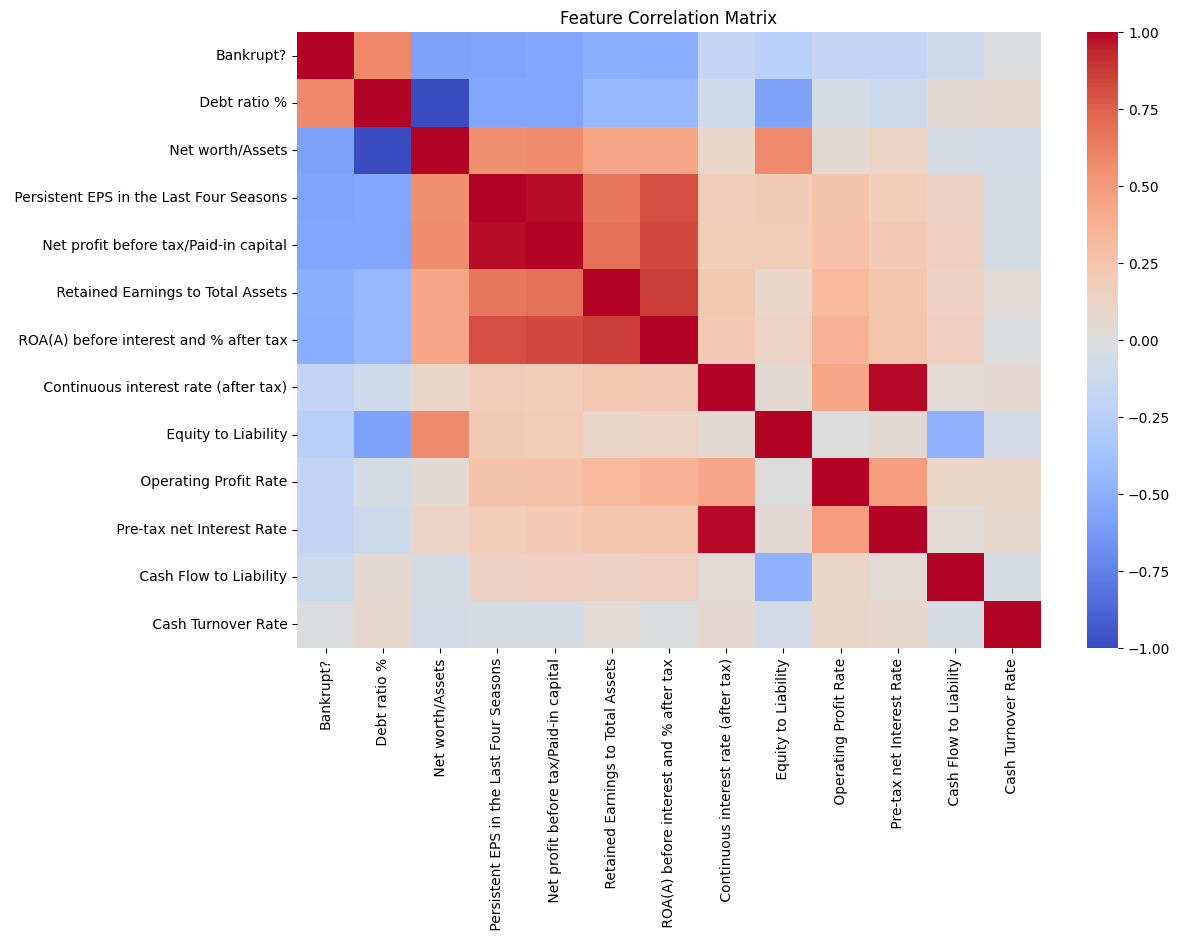

In [57]:
# Feature celection correlation matrix heatmap
selected_columns_indices = [1, 38, 39, 20, 44, 69, 3, 11, 96, 7, 8, 82, 75]
features22 = fold22_total.iloc[:, selected_columns_indices]

plt.figure(figsize=(12, 8))
sns.heatmap(features22.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

### **Feature Selection Correlation Analysis**

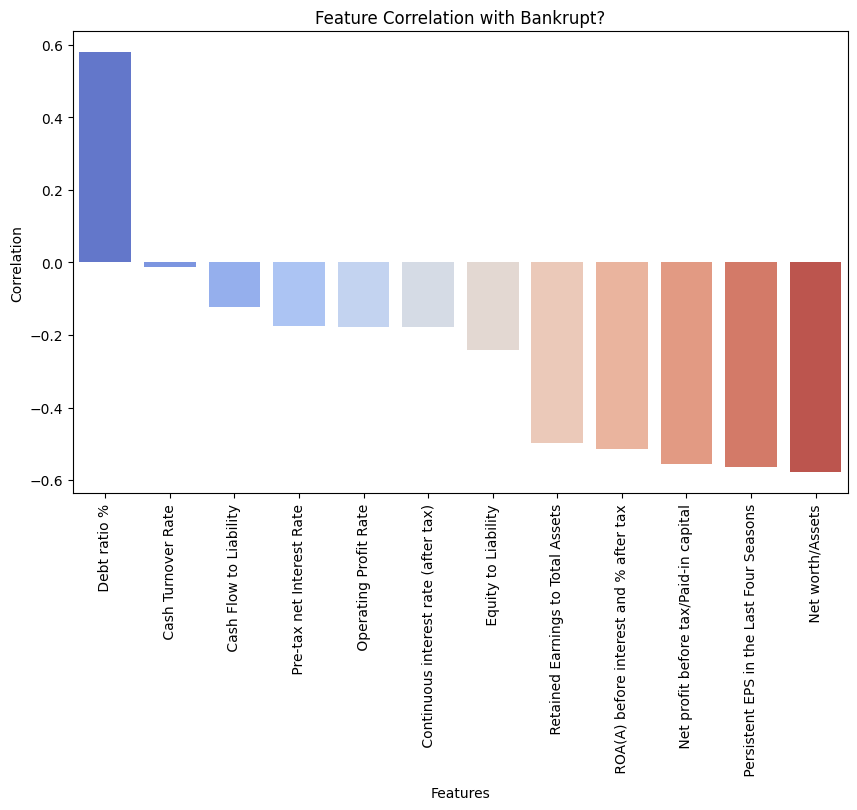

                                         Correlation with Bankrupt?
Debt ratio %                                               0.579058
Cash Turnover Rate                                        -0.012013
Cash Flow to Liability                                    -0.122168
Pre-tax net Interest Rate                                 -0.174319
Operating Profit Rate                                     -0.177561
Continuous interest rate (after tax)                      -0.177684
Equity to Liability                                       -0.242476
Retained Earnings to Total Assets                         -0.498012
ROA(A) before interest and % after tax                    -0.515319
Net profit before tax/Paid-in capital                     -0.555899
Persistent EPS in the Last Four Seasons                   -0.563779
Net worth/Assets                                          -0.579058


In [59]:
# List of indices excluding 'Bankrupt?' (removing index 1)
selected_columns_indices = [1, 38, 39, 20, 44, 69, 3, 11, 96, 7, 8, 82, 75]

# Create a DataFrame with selected columns and the target variable
features_with_target = fold22_total.iloc[:, selected_columns_indices] 

# Compute correlation of each feature with 'Bankrupt?'
correlation_with_target = features_with_target.corr()["Bankrupt?"].drop("Bankrupt?")

# Create a DataFrame to display correlation values
correlation_df = correlation_with_target.to_frame(name="Correlation with Bankrupt?").sort_values(by="Correlation with Bankrupt?", ascending=False)

# Plot a bar chart to visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y=correlation_df["Correlation with Bankrupt?"], hue=correlation_df.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Bankrupt?")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.show()

print(correlation_df)

### Correlation Analysis from Feature Selection  

This analysis examines the isolated correlation of selected financial ratios (FRs) with bankruptcy. The results indicate that **"Debt ratio %"** is the only variable with a strong positive correlation (+0.579058) with bankruptcy, suggesting that higher debt levels increase the likelihood of financial distress.  

On the other hand, most other features show negative correlations, meaning they may act as protective factors against bankruptcy. **"Net worth/Assets" (-0.579058), "Persistent EPS in the Last Four Seasons" (-0.563779), and "Net profit before tax/Paid-in capital" (-0.555899)** have the strongest negative correlations, suggesting that companies with higher net worth, stable earnings, and profitability are less likely to fail.  

It is important to note that this is an **isolated correlation analysis** based on feature selection. In predictive models, the combined effect of multiple variables can alter their individual impact. Some variables that appear strongly correlated in isolation may have different influences when analyzed in a multivariate context. Therefore, further modeling is needed to assess their true predictive power.  


---
# 4. Modeling & Evaluation  
---

In [61]:
# List of selected column indices based on previous feature selection process
selected_columns = [0, 1, 38, 39, 20, 44, 69, 3, 11, 96, 7, 8, 82, 75]
folds_selected = fold22_total.iloc[:, selected_columns]

## Machine Learning Model Evaluation Metrics

**Accuracy:** measures the proportion of correctly classified instances among the total number of instances. While useful, accuracy can be misleading in imbalanced datasets. **Formula:**
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Where:
- **TP** (True Positive) = Correctly classified positive instances.
- **TN** (True Negative) = Correctly classified negative instances.
- **FP** (False Positive) = Incorrectly classified negative instances as positive.
- **FN** (False Negative) = Incorrectly classified positive instances as negative.

**Confusion Matrix:** is a table that summarizes the model’s performance by showing the number of correct and incorrect predictions categorized by class. **Example:**
```
        Predicted Positive | Predicted Negative
Actual Positive |    TP    |    FN  
Actual Negative |    FP    |    TN  
```
It is useful for calculating precision, recall, and other evaluation metrics.

**Type I Error (False Negative):** occurs when a positive instance is incorrectly classified as negative. In high-risk domains (e.g., fraud detection, medical diagnosis), reducing false negatives is critical. **Formula:**
$$
Type I Error Rate = \frac{FN}{FN + TP}
$$

**Type II Error (False Positive):** occurs when a negative instance is incorrectly classified as positive. This may lead to unnecessary actions being taken (e.g., rejecting a loan application for a reliable borrower). **Formula:**
$$
Type II Error Rate = \frac{FP}{FP + TN}
$$

**Recall (Sensitivity):** measures the ability of the model to correctly identify all positive instances. It is crucial when missing a positive case is costly. **Formula:**
$$
Recall = \frac{TP}{TP + FN}
$$

**Precision:** measures how many of the predicted positive instances are actually positive. It is essential when false positives must be minimized (e.g., spam filtering). **Formula:**
$$
Precision = \frac{TP}{TP + FP}
$$

**F1-score:** is the harmonic mean of precision and recall, providing a balanced measure when there is an uneven class distribution. **Formula:**
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

**ROC (Receiver Operating Characteristic) Curve:** plots the True Positive Rate (Recall) against the False Positive Rate. The **AUC (Area Under the Curve)** quantifies the overall ability of the model to distinguish between classes.

- **AUC = 1.0** → Perfect Model
- **AUC = 0.5** → Random Guessing
- **AUC < 0.5** → Worse than Random

**Misclassification Cost:** evaluates the financial impact of incorrect classifications, taking into account the different consequences of false positives and false negatives. **Formula:**
$$
Total Cost = (False Negatives \times Cost_{FN}) + (False Positives \times Cost_{FP})
$$

This metric helps in optimizing models based on real-world business impact rather than just statistical accuracy.

In [73]:
# Number of folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store results
models = {
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "CART": DecisionTreeClassifier(criterion="gini", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='lbfgs',
                          learning_rate_init=0.0005, max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
}

results = {model: {} for model in models.keys()}

# Convert data 
X = folds_selected.iloc[:, 2:]  # Exclude company index and target variable
y = folds_selected.iloc[:, 1]  # Target variable (Bankrupt?)

# Iterate over the folds
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        # Store metrics
        results[model_name][f"Fold_{i}"] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "AUC": roc_auc_score(y_test, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0
        }

# Convert results to DataFrame for easy comparison
results_df = {model: pd.DataFrame.from_dict(results[model], orient="index") for model in models.keys()}

# Print the metrics for each model
for model, dfk in results_df.items():
    print(f"Results for {model}:")
    print(dfk)
    print("-" * 100)

# Compute overall average metrics and store them in a summary DataFrame
average_metrics = {}
for model, dfk in results_df.items():
    average_metrics[model] = dfk.mean()

summary_df = pd.DataFrame(average_metrics).T  # Transpose to have models as columns
print("Summary of average metrics across models:")
print(summary_df)
print("-" * 100)

##################################### Train final models using all folds ##################################### 
final_models = {model_name: model.fit(X, y) for model_name, model in models.items()}
print("Final models trained using all 10 folds.")

Results for SVM:
        Accuracy  Precision    Recall  F1-Score       AUC  \
Fold_0  0.863636   0.833333  0.833333  0.833333  0.938034   
Fold_1  0.840909   0.772727  0.894737  0.829268  0.909474   
Fold_2  0.863636   0.916667  0.846154  0.880000  0.955128   
Fold_3  0.818182   0.750000  0.900000  0.818182  0.920833   
Fold_4  0.840909   0.875000  0.840000  0.857143  0.913684   
Fold_5  0.818182   0.760000  0.904762  0.826087  0.915114   
Fold_6  0.886364   0.884615  0.920000  0.901961  0.943158   
Fold_7  0.818182   0.842105  0.761905  0.800000  0.915114   
Fold_8  0.795455   0.800000  0.761905  0.780488  0.875776   
Fold_9  0.931818   1.000000  0.875000  0.933333  0.958333   

        Type I Error (FN Rate)  Type II Error (FP Rate)  
Fold_0                0.166667                 0.115385  
Fold_1                0.105263                 0.200000  
Fold_2                0.153846                 0.111111  
Fold_3                0.100000                 0.250000  
Fold_4               

---
### 📌 The **models 4.1 to 4.5** are based on the methodology proposed by Liang et al. (2016).
- 4.1- Support Vector Machine (SVM) 
- 4.2- K-Nearest Neighbors (KNN) 
- 4.3- Classification and Regression Tree (CART)
- 4.4- Multilayer Perceptron (MLP) 
- 4.5- Naïve Bayes (NB)
---

### 4.1- Support Vector Machine (SVM) 

Support Vector Machine (SVM) is a supervised learning algorithm used for classification tasks. It works by finding the optimal hyperplane that best separates bankrupt and non-bankrupt companies. If the data is not linearly separable, SVM applies the **kernel trick** to transform it into a higher-dimensional space for better separation.

**How SVM Works**
1. **Finds the best decision boundary (hyperplane)** that maximizes separation between classes.
2. **Uses support vectors**, which are the closest points to the hyperplane, to define the boundary.
3. **Applies the "kernel trick"** to transform non-linearly separable data into a higher-dimensional space, allowing SVM to find a better separation.

**Why Use SVM for Bankruptcy Prediction?**
- **Handles high-dimensional financial data well**.
- **Effective for small-to-medium-sized datasets**.
- **Robust to overfitting**, especially with properly tuned hyperparameters.

**We will implement SVM using:**
    
✅ **10-fold cross-validation** for robust evaluation.  
✅ **A Radial Basis Function (RBF) kernel**, which helps model complex financial patterns.  
✅ **A final SVM model trained on all data** to be used for real-world bankruptcy prediction.  



### 4.2- K-Nearest Neighbors (KNN) 

K-Nearest Neighbors (KNN) is a simple yet powerful **supervised learning algorithm** used for classification. It works by **finding the "k" closest data points** (neighbors) to a given sample and classifying it based on the majority class among its neighbors.

### **How KNN Works**
1. **Choose a value for "k"** (e.g., k=5).
2. **Measure the distance** (e.g., Euclidean) between the new data point and all training samples.
3. **Select the k nearest neighbors** (smallest distances).
4. **Predict the majority class** among those neighbors.

### **Advantages of KNN**
- **Simple and intuitive** – Works without explicit model training.
- **Handles non-linear data well**.
- **No assumptions about data distribution**.

### **Disadvantages**
- **Computationally expensive** for large datasets.
- **Sensitive to irrelevant features** – Feature scaling is important.

We will now implement **KNN using 10-fold cross-validation**, followed by training a **final KNN model** on the full dataset.


### 4.3- Classification and Regression Tree (CART)

Classification and Regression Tree (CART) is a **decision tree-based machine learning algorithm** that recursively splits the dataset into smaller subsets based on feature values to create a predictive model. It is commonly used for **classification** and **regression** tasks.

**How CART Works**
1. **Selects the best feature to split** the data using criteria like **Gini Impurity** or **Entropy (Information Gain)**.
2. **Recursively splits** the data into branches until reaching a stopping condition (e.g., max depth, minimum samples per leaf).
3. **Makes predictions** based on the majority class in the terminal nodes (leaves).

**Why Use CART for Bankruptcy Prediction?**
- **Interpretable and easy to understand** – Shows clear decision paths.
- **Handles numerical and categorical data** – Works well with financial ratios.
- **Performs automatic feature selection** – Identifies the most important financial indicators.

We will implement the **CART algorithm using DecisionTreeClassifier**, with:

✅ **10-fold cross-validation** to evaluate model performance.  
✅ **A final CART model trained on all data** to be used for bankruptcy prediction.  
✅ **Gini Impurity as the splitting criterion**, which measures the "purity" of a node.  


### 4.4- Multilayer Perceptron (MLP) 

Multilayer Perceptron (MLP) is a **feedforward artificial neural network** that consists of multiple layers of neurons. It is capable of capturing **complex patterns** in financial data, making it a powerful model for bankruptcy prediction.

**How MLP Works**
1. **Input Layer:** Receives the financial indicators as input features.
2. **Hidden Layers:** Apply **weights and activation functions** (e.g., ReLU, Sigmoid) to learn representations.
3. **Output Layer:** Produces the final classification (Bankrupt or Non-Bankrupt) using a **Sigmoid or Softmax activation**.

**Why Use MLP for Bankruptcy Prediction?**
- **Captures non-linear relationships** in financial data.
- **Automatically learns feature interactions** without manual engineering.
- **Performs well on large datasets**, but requires careful tuning for small datasets.

**Adjustments for a Small Dataset**

Since our dataset contains only **440 companies (44 per fold)**, we made optimizations:
- ✅ **Reduced the number of neurons in the hidden layer** → `hidden_layer_sizes=(16,)` to prevent overfitting.
- ✅ **Changed the optimizer to `lbfgs`** → Works better for small datasets.
- ✅ **Increased `max_iter=1000`** → Allows more time for convergence.
- ✅ **Adjusted `learning_rate_init=0.0005`** → Stabilizes training.

We will implement **MLP using the `MLPClassifier` from Scikit-Learn**, with:

✅ **10-fold cross-validation** to evaluate model performance.  
✅ **A final MLP model trained on all data** to be used for bankruptcy prediction.  
✅ **Optimized hyperparameters** to improve performance on a small dataset.  

### 4.5- Naïve Bayes (NB)

Naïve Bayes (NB) is a **probabilistic classifier** based on **Bayes' Theorem**, which assumes that features are **conditionally independent** given the class label. Despite its simplicity, it is highly effective for classification tasks, especially when dealing with **small datasets**.

**How Naïve Bayes Works**
1. **Calculates the probability of each class** based on prior data (e.g., probability of bankruptcy vs. non-bankruptcy).
2. **Uses conditional probabilities** of each feature given the class (assumes independence between features).
3. **Applies Bayes' Theorem** to compute the final probability for each class and assigns the most likely label.

**Why Use Naïve Bayes for Bankruptcy Prediction?**
- **Fast and efficient**, even with large datasets.
- **Works well with small datasets**, unlike complex models that may require more training data.
- **Handles categorical and continuous data**, making it adaptable to financial ratios.

**We will implement Naïve Bayes using:**

✅ **10-fold cross-validation** to evaluate model performance.  
✅ **Gaussian Naïve Bayes**, which assumes that numerical features follow a normal distribution.  
✅ **A final NB model trained on all data** to be used for bankruptcy prediction.  .

---
### 📌 Additional Bankruptcy Prediction Models: 4.6 to 4.8

Building upon the methodology proposed by Liang et al. (2016), we extend the bankruptcy prediction analysis by evaluating three additional machine learning models that were not explored in the original study. 
- 4.6 - Random Forest (RF)
- 4.7 - Extreme Gradient Boosting (XGBoost)
- 4.8 - Logistic Regression (LR)
---

### 4.6- Random Forest 

Random Forest is an **ensemble learning method** that combines multiple **decision trees** to improve classification accuracy and reduce overfitting. It is one of the most powerful and widely used machine learning algorithms.

**How Random Forest Works**
1. **Creates multiple decision trees**, each trained on a different subset of the data.
2. **Averages the predictions** (or takes the majority vote) from all trees.
3. **Reduces overfitting**, as individual trees may be weak learners, but the ensemble provides robustness.

**Why Use Random Forest for Bankruptcy Prediction?**
- **High accuracy and robustness** against overfitting.
- **Automatically selects important features**, handling high-dimensional financial data well.
- **Works well with imbalanced datasets**, as multiple trees reduce bias.


We will implement **Random Forest using `RandomForestClassifier`**, with:
    
✅ **10-fold cross-validation** to evaluate model performance.  
✅ **A final Random Forest model trained on all data** to be used for bankruptcy prediction.  
✅ **100 trees (`n_estimators=100`)** to balance accuracy and efficiency.  


### 4.7- XGBoost 

Extreme Gradient Boosting (**XGBoost**) is a powerful **ensemble learning algorithm** based on **gradient boosting**. It builds multiple weak decision trees in sequence, improving each one by minimizing errors from the previous trees.

**How XGBoost Works**
1. **Starts with a weak decision tree** (typically a shallow tree).
2. **Adjusts the next trees** to correct errors made by the previous ones.
3. **Uses gradient descent** to optimize the model by reducing the loss function.
4. **Combines all trees** to create a strong final model.

**Why Use XGBoost for Bankruptcy Prediction?**
- **Handles missing values and noisy financial data efficiently**.
- **Regularization techniques** prevent overfitting.
- **Highly optimized and computationally efficient**.
- **Performs well with imbalanced datasets**, common in bankruptcy prediction.

We will implement **XGBoost using the `XGBClassifier` from XGBoost library**, with:
✅ **10-fold cross-validation** to evaluate model performance.  
✅ **A final XGBoost model trained on all data** to be used for bankruptcy prediction.  
✅ **100 estimators (`n_estimators=100`)** and a **learning rate of 0.1** for balanced performance.  


### 4.8- Logistic Regression

Logistic Regression is a **statistical model** used for **binary classification problems**, such as predicting whether a company will go bankrupt or not. It estimates the probability of an event occurring by applying a **logistic (sigmoid) function** to a linear combination of input features.

**How Logistic Regression Works**
1. **Computes a weighted sum** of input features.
2. **Applies the sigmoid function** to output a probability between 0 and 1.
3. **Classifies companies** as bankrupt (`1`) or non-bankrupt (`0`) based on a probability threshold (typically 0.5).

**Why Use Logistic Regression for Bankruptcy Prediction?**
- **Simple and interpretable** – Easy to understand the impact of financial indicators.
- **Less prone to overfitting** compared to complex models.
- **Performs well when the data is linearly separable**.

We will implement **Logistic Regression using `LogisticRegression` from Scikit-Learn**, with:
    
✅ **10-fold cross-validation** to evaluate model performance.  
✅ **A final Logistic Regression model trained on all data** to be used for bankruptcy prediction.  
✅ **L2 regularization (`penalty='l2'`)** to prevent overfitting.  

### Model Comparison: Average Accuracy Over 10 Folds

In [88]:
# Sorting the DataFrame from highest to lowest accuracy
summary_df.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
Random Forest,0.865909,0.878160,0.857485,0.863868,0.918636,0.142515,0.130195
MLP,0.859091,0.865917,0.848643,0.855043,0.929095,0.151357,0.131196
Logistic Regression,0.852273,0.857987,0.846074,0.848927,0.921306,0.153926,0.139042
SVM,0.847727,0.843445,0.853780,0.845980,0.924465,0.146220,0.155750
XGBoost,0.840909,0.828392,0.855860,0.839448,0.917186,0.144140,0.175425
KNN,0.809091,0.798708,0.826648,0.808750,0.879510,0.173352,0.204163
CART,0.759091,0.764281,0.741202,0.748238,0.756089,0.258798,0.229024
Naive Bayes,0.740909,0.867851,0.566591,0.679017,0.890534,0.433409,0.085807


## Exploring Alternative Techniques Beyond Liang et al. (2016)

In this phase of the analysis, we explore **alternative techniques** for bankruptcy prediction, deviating from the methodology presented in **Liang et al. (2016)**. Specifically, we introduce:
- **SMOTE (Synthetic Minority Over-sampling Technique)** for handling class imbalance.
- **Automated Feature Selection** through model learning, rather than predefined statistical techniques.

**Why These Changes?**
Liang et al. (2016) primarily focused on **manual feature selection** methods, such as **Stepwise Logistic Regression (SLR)** and **t-tests**. However, modern machine learning techniques often perform **intrinsic feature selection**, especially tree-based models and L1-regularized models (such as LASSO). Additionally, SMOTE allows us to **balance the dataset**, addressing the imbalance between bankrupt and non-bankrupt companies, which was not explicitly tackled in the original study.


**Overview of the Code Implementation**
    
**Train-Test Split**
   - Reserves **10% of the dataset for final testing** (`X_test, y_test`).
   - Ensures that class proportions remain unchanged using **stratified sampling**.

**Stratified 10-Fold Cross-Validation**
   - Uses **StratifiedKFold(n_splits=10)** to create **10 balanced training-validation splits**.
   - Each fold ensures the **same class distribution** as the original dataset.

**Applying SMOTE on Training Data**
   - Within each fold, **SMOTE is applied only to the training set** (never on validation or test data).
   - Balances the dataset by **generating synthetic samples** for the minority class (`Bankrupt? = 1`).
   - The class distribution **before and after SMOTE** is printed for verification.

---

** Expected Advantages**
- **Better Handling of Imbalance**: Models can now learn bankruptcy patterns without being biased towards the majority class.
- **Automated Feature Selection**: Instead of manually selecting variables, models will determine the most relevant features.
- **Stronger Generalization**: Cross-validation ensures robust performance evaluation, reducing overfitting risks.

This approach aligns with modern **machine learning best practices** and allows us to compare how different methodologies impact bankruptcy prediction accuracy. 

In [91]:
# Data Preparation
df_new = df.drop(columns=["Company"])
X_new = df_new.drop(columns=["Bankrupt?"])  # Features
y_new = df_new["Bankrupt?"]  # Target variable

# Normalize dataset to improve MLP convergence
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_new)

# Splitting Train and Test Data (10% test size, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_new, test_size=0.1, stratify=y_new, random_state=42
)

# Setting up Stratified K-Fold Cross Validation (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the machine learning models
models = {
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "CART": DecisionTreeClassifier(criterion="gini", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam',
                          learning_rate_init=0.0005, max_iter=10000, random_state=42),  # Increased max_iter, changed solver to 'adam'
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
}

# Dictionary to store results
results = {model: {} for model in models.keys()}

# Iterate over the folds and apply SMOTE in the training set
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n Processing Fold {fold_idx + 1}")

    # Splitting into training and validation sets
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Apply SMOTE only to the training set (Never to validation/test)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Checking class distribution before and after SMOTE
    print("Before SMOTE:", np.bincount(y_train_fold))
    print("After SMOTE:", np.bincount(y_train_resampled))

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        
        # Make predictions
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val_fold, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        # Store metrics
        results[model_name][f"Fold_{fold_idx}"] = {
            "Accuracy": accuracy_score(y_val_fold, y_pred),
            "Precision": precision_score(y_val_fold, y_pred),
            "Recall": recall_score(y_val_fold, y_pred),
            "F1-Score": f1_score(y_val_fold, y_pred),
            "AUC": roc_auc_score(y_val_fold, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0
        }

# Convert results to DataFrame for easy comparison
results_df = {model: pd.DataFrame.from_dict(results[model], orient="index") for model in models.keys()}

# Print the metrics for each model
for model, dfk in results_df.items():
    print(f"Results for {model}:")
    print(dfk)
    print("-" * 100)

# Compute overall average metrics and store them in a summary DataFrame
average_metrics = {model: dfk.mean() for model, dfk in results_df.items()}
summary_df_new = pd.DataFrame(average_metrics).T 

# Display summary of average model performance
print("Summary of average metrics across models:")
print(summary_df_new)
print("-" * 100)

# Train final models using all training data (X_train, y_train)
final_models = {model_name: model.fit(X_train, y_train) for model_name, model in models.items()}
print("Final models trained using all training data.")



 Processing Fold 1
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 2
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 3
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 4
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 5
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 6
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 7
Before SMOTE: [5345  178]
After SMOTE: [5345 5345]

 Processing Fold 8
Before SMOTE: [5345  179]
After SMOTE: [5345 5345]

 Processing Fold 9
Before SMOTE: [5345  179]
After SMOTE: [5345 5345]

 Processing Fold 10
Before SMOTE: [5346  178]
After SMOTE: [5346 5346]
Results for SVM:
        Accuracy  Precision    Recall  F1-Score       AUC  \
Fold_0  0.889251   0.200000  0.800000  0.320000  0.929293   
Fold_1  0.881107   0.172840  0.700000  0.277228  0.888973   
Fold_2  0.864821   0.153846  0.700000  0.252252  0.910354   
Fold_3  0.856678   0.166667 

🆕 **New model - using Train-Test Split, Stratified 10-Fold Cross-Validation, and SMOTE applied to Training Data**

In [98]:
summary_df_new.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost,0.957635,0.391124,0.514211,0.442313,0.936290,0.485789,0.027613
Random Forest,0.955679,0.364387,0.499211,0.419997,0.940928,0.500789,0.029129
CART,0.932868,0.227738,0.433947,0.296553,0.691717,0.566053,0.050513
MLP,0.927981,0.239184,0.546053,0.330732,0.876003,0.453947,0.059268
KNN,0.882357,0.142166,0.520263,0.222913,0.763741,0.479737,0.105573
SVM,0.876815,0.176813,0.762368,0.286676,0.912926,0.237632,0.119378
Logistic Regression,0.867851,0.175421,0.828158,0.289142,0.924926,0.171842,0.130827
Naive Bayes,0.299824,0.040225,0.903684,0.077017,0.685874,0.096316,0.720326


📖 ** Paper Model - using Stratified Sampling and Feature Selection based on Liang et al. (2016)**

In [100]:
summary_df.sort_values(by="Accuracy", ascending=False)

,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
Random Forest,0.865909,0.878160,0.857485,0.863868,0.918636,0.142515,0.130195
MLP,0.859091,0.865917,0.848643,0.855043,0.929095,0.151357,0.131196
Logistic Regression,0.852273,0.857987,0.846074,0.848927,0.921306,0.153926,0.139042
SVM,0.847727,0.843445,0.853780,0.845980,0.924465,0.146220,0.155750
XGBoost,0.840909,0.828392,0.855860,0.839448,0.917186,0.144140,0.175425
KNN,0.809091,0.798708,0.826648,0.808750,0.879510,0.173352,0.204163
CART,0.759091,0.764281,0.741202,0.748238,0.756089,0.258798,0.229024
Naive Bayes,0.740909,0.867851,0.566591,0.679017,0.890534,0.433409,0.085807


---
# 5. Conclusion & Next Steps   
---

### 📉 Bankruptcy Prediction: Comparing New Models vs. Liang et al. (2016)

In the financial market, predicting bankruptcy is a **critical task**. The cost of failing to detect a bankrupt company (**False Negative - FN**) is far greater than mistakenly labeling a healthy company as bankrupt (**False Positive - FP**).  

This analysis compares **two different modeling approaches**:
- **📖 Paper Models (Liang et al., 2016):** Stratified Sampling + Feature Selection  
- **🆕 New Models:** Train-Test Split + Stratified 10-Fold Cross-Validation + SMOTE  

Since **only 3.2% of companies in dataset go bankrupt**, the goal is not just to have high accuracy but to **maximize recall and reduce false negatives**, ensuring bankruptcies are correctly identified.

---

**Key Metrics for Bankruptcy Prediction**
A good bankruptcy prediction model should prioritize:
- ** Recall (Sensitivity):** How many bankruptcies are correctly identified?  
- ** Type I Error (False Negative Rate - FN Rate):** How many bankrupt companies were wrongly classified as healthy?  
- ** Precision:** How many predicted bankruptcies were actually correct?  

High **accuracy alone is misleading** in this scenario. A model can achieve **97% accuracy** just by predicting every company as **healthy**, but that would **fail entirely at detecting bankruptcies**.

---

**Model Comparison: Who Predicts Bankruptcy Better?**

**🆕 New Models (SMOTE + Cross-Validation)**
✔ **Higher accuracy (XGBoost: 95.7%, Random Forest: 95.5%)**  
✔ **Lower false positives (Type II Error, FP Rate)** → Fewer companies wrongly classified as bankrupt  
❌ **Very low precision (~0.39 for XGBoost, 0.36 for RF)** → Too many false bankruptcies predicted  
❌ **High false negatives (~48-50%)** → **Nearly half of bankruptcies are missed!**  

**🚨 Issue:**  
These models **prioritize overall accuracy**, but they struggle to identify bankruptcies correctly. **False negatives are dangerously high**, making them **risky for financial decision-making**.

---

**📖 Paper Models (Liang et al., 2016)**
❌ **Lower accuracy (~86-87%)**, but that’s expected in an imbalanced dataset  
✔ **Much higher precision (~0.87 for Random Forest)** → Fewer false alarms  
✔ **Lower false negatives (FN Rate ~14-15%)** → **Detects more bankruptcies correctly**  
✔ **Balanced recall (~85%)** → Captures a significant portion of bankrupt companies  

** Why These Models Are Better for Bankruptcy Prediction:**  
- **They detect more bankruptcies**, reducing **Type I errors** (FN).  
- **They balance recall and precision**, making them **reliable for risk assessment**.  
- **They prioritize minimizing the worst-case scenario (missing a bankruptcy).**  

---

**🚨 The Worst Model: Predicting Every Company as Healthy**
If a model simply **classifies all companies as non-bankrupt (0)**, it will achieve:
✔ **~97% accuracy** (since most companies truly are healthy)  
❌ **0% recall for bankruptcies** → **Completely fails to detect failing companies**  
❌ **100% False Negative Rate (FN Rate)** → **All bankruptcies are missed**  
❌ **No practical value** → **Useless for financial risk prediction**  

**Conclusion:**  
A model **must do more than just achieve high accuracy**. It needs to **identify bankruptcies correctly**, which is why **the paper models (Liang et al., 2016) are superior in real-world financial applications**.

---

**🏆 Final Verdict: Which Model is Best for Bankruptcy Prediction?**
| Model | Accuracy | Recall (Bankruptcies) | False Negatives (FN Rate) | Precision |
|--------|------------|----------------|-----------------|-------------|
| **📖 Paper Models** (Liang et al., 2016) | **86-87%** | **~85%** ✅ | **~14-15%** ✅ | **~0.87** ✅ |

** The best model is the one that minimizes the risk of missing bankruptcies.**  
✔ **The models from Liang et al. (2016) are better suited for predicting financial distress.**  
✔ **They detect more bankruptcies and maintain a lower FN rate, making them more reliable for financial decision-making.**  
❌ **The new models have higher accuracy but fail to detect enough bankruptcies, making them unsuitable for risk assessment.**  

**In bankruptcy prediction, recall and FN rate matter more than accuracy!**  


### Next Steps  

This study has demonstrated that **recall and false negative rate** are critical when predicting corporate bankruptcy. The **Liang et al. (2016) models** have shown a more balanced approach, correctly identifying bankrupt companies while maintaining precision. However, further improvements can be made to enhance model performance and generalizability.  

### 🔹 **Future Improvements**
1️⃣ **Hyperparameter Tuning** → The current machine learning models were used with their default settings. Optimizing hyperparameters (e.g., learning rate, max depth, number of estimators) could significantly improve recall without sacrificing too much precision.  
2️⃣ **Alternative Rebalancing Techniques** → While SMOTE was used to address class imbalance, other techniques such as **cost-sensitive learning, focal loss, or undersampling methods** can be explored to further minimize false negatives.  
3️⃣ **Feature Selection Optimization** → The feature selection process could be refined by testing different techniques like **Recursive Feature Elimination (RFE), Lasso Regularization, or SHAP-based feature importance** to improve interpretability and efficiency.  
4️⃣ **Ensemble & Hybrid Models** → Combining different models (e.g., stacking models or blending strategies) may improve prediction robustness.  
5️⃣ **Real-World Validation** → Applying the model to real-world financial datasets from different economic conditions and industries can help assess its generalization power.  

By implementing these improvements, the model can **better balance recall, precision, and generalizability**, making it more suitable for financial risk assessment in practical applications.  

### ⚠️ Important Note  
This project was developed as part of a **Data Science portfolio** to demonstrate the application of **machine learning techniques** in bankruptcy prediction. The results presented here are for **educational and analytical purposes only** and should not be considered as **financial advice or a definitive scientific study**.  

The models were trained and evaluated within the **constraints of the available dataset** and do not account for **external economic conditions, financial market volatility, industry-specific factors, or regulatory changes**. Therefore, any real-world implementation should be **validated with additional data sources and expert financial analysis** before being used for decision-making.  